# Bank Word Embeddings ptBR

## 1. Contexto

### 1.1. Contexto

Word Embeddings utilizados estão disponíveis em: http://nilc.icmc.usp.br/embeddings

Os modelos pré-treinados usados são **Word2Vec CBOW 50 dimensões** (cbow_s50.txt) e **Glove 50 dimensões** (glove_s50.txt).

A ideia foi treinar um **word embedding específico para o domínio bancário no idioma Português**, comparar a similaridade obtida para alguns pares de palavras do domínio bancário dos word embeddings de escopo geral com o word embedding criado para o domínio específico bancário.

### 1.2. Artigo Base

Trechos retirados do artigo "Portuguese Word Embeddings: Evaluating on Word Analogies and Natural Language Tasks", disponível em https://arxiv.org/abs/1708.06025

"Different algorithms have been developed to generate embeddings. They can be
roughly divided into two families of methods: the first is composed of methods that work with a **co-occurrence word matrix**, such as Latent Semantic Analysis (LSA), Hyperspace Analogue to Language (HAL) and **Global Vectors (GloVe)**. The second is composed of **predictive methods**, which try to predict neighboring words given one or more context words, such as **Word2Vec**."

"The **Global Vectors (GloVe)** method was proposed by [Pennington et al. 2014], and obtained stateof-the-art results for syntactic and semantic analogies tasks. This method consists in a co-occurrence matrix
M that is constructed by looking at **context words**. Each element Mij in the matrix represents the probability
of the word i being close to the word j. In the matrix M, the rows (or vectors) are randomly generated and
trained by obeying the equation P(wi
, wj ) = log(Mij ) = wiwj +bi+bj
, where wi and wj are word vectors,
and bi and bj are biases."

"**Word2Vec** is a widely used method in NLP for generating word embeddings. It has two different
training strategies: (i) **Continuous Bag-of-Words (CBOW)**, in which the model is given a sequence of words
without the middle one, and attempts to predict this omitted word; (ii) **Skip-Gram**, in which the model is
given a word and attempts to predict its neighboring words. In both cases, the model consists of only a
single weight matrix (apart from the word embeddings), which results in a fast log-linear training that is
able to capture semantic information [Mikolov et al. 2013]."

## 2. Aspectos Preliminares

### 2.1. Setup Google Colab

*Se for usar localmente em Jupyter Notebook*: baixar os arquivos e trocar o path no código.

*Se for usar no Google Colab*: copiar para seu drive, e "montar o drive" para fornecer acesso (Menu à esquerda -> Arquivos -> Montar Drive).

In [1]:
cbow = '/content/drive/MyDrive/PCS5029 Bank Word Embedding ptBR/cbow_s50.txt'

glove = '/content/drive/MyDrive/PCS5029 Bank Word Embedding ptBR/glove_s50.txt'

### 2.2. Importação de Bibliotecas

In [2]:
from scipy.spatial.distance import cosine

from gensim.models import KeyedVectors

### 2.3. Carregar os modelos

In [3]:
model_cbow = KeyedVectors.load_word2vec_format(cbow)

model_glove = KeyedVectors.load_word2vec_format(glove)

### 2.4. Definição de função para cálculo de similaridade

In [127]:
def similarity_2words(word1, word2, model):

  try:
    wordvec_word1 = model.word_vec(word1)

  except:
    wordvec_word1 = model[word1]


  try:
    wordvec_word2 = model.word_vec(word2)

  except:
    wordvec_word2 = model[word2]


  cos_similarity = 1 - cosine(wordvec_word1, wordvec_word2)

  return cos_similarity

## 3. Treinamento do BWE com Word2Vec

BWE: Bank Word Embedding

Word2Vec da biblioteca Gensim e tutorial disponível em: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Exemplo NLTK para português: http://www.nltk.org/howto/portuguese_en.html

Tutorial NLTK para português: https://medium.com/@viniljf/utilizando-processamento-de-linguagem-natural-para-criar-um-sumariza%C3%A7%C3%A3o-autom%C3%A1tica-de-textos-775cb428c84e

### 3.1. Importar bibliotecas

In [13]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
! pip install --upgrade gensim

     |████████████████████████████████| 24.2MB 1.4MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [94]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

In [109]:
from string import punctuation

### 3.2. Glossário de Termos Financeiros do Bacen

Glossário Simplificado de Termos Financeiros do Banco Central (Bacen): https://www.bcb.gov.br/content/cidadaniafinanceira/documentos_cidadania/biblioteca/glossario_cidadania_financeira.pdf

In [74]:
% cd /content/drive/MyDrive/PCS5029 Bank Word Embedding ptBR/corpus/

/content/drive/MyDrive/PCS5029 Bank Word Embedding ptBR/corpus


In [75]:
% ls

glossario.txt  preprocessing.py


### 3.3. Pré-processamento

#### 3.3.1. Script de pré-processamento do NILC

python preprocessing.py <input_file.txt> <output_file.txt>

In [76]:
!python preprocessing.py glossario.txt glossario_preprocessed.txt

Tokens:  10980
Vocabulary:  1462


Corpus original, de escopo geral:

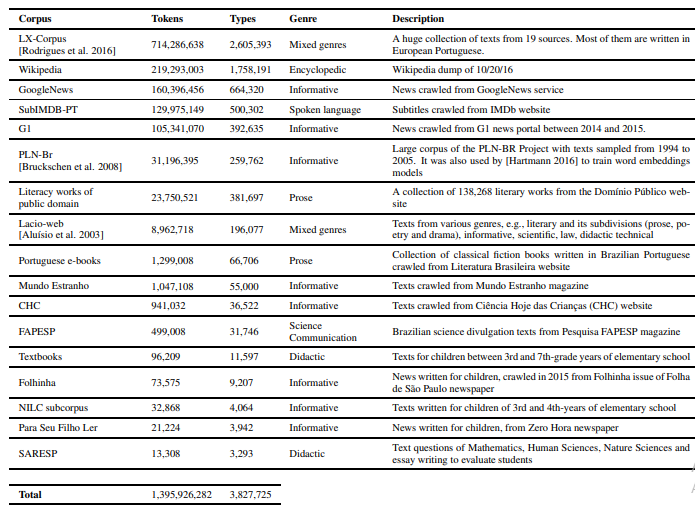

#### 3.3.2. Pré-processamento próprio

In [107]:
def opentxt(arquivo):

  with open(arquivo, "r") as text_file:
    string_list = text_file.readlines()

  sentences = []

  for string in string_list:
    sentence = word_tokenize(string.lower())
    sentences.append(sentence)

  return sentences


  f = open(arquivo, "r", encoding="utf8")

  for line in f:
      series.append(line)

  f.close()

  return series

In [113]:
series = opentxt('glossario_preprocessed.txt')

series[0]

['pagamento', 'em', 'data', 'posterior', 'à', 'compra', '.']

In [118]:
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords = set(stopwords + list(punctuation))

sentences = []

for sentence in series:
  sentence = [palavra for palavra in sentence if palavra not in stopwords]
  sentences.append(sentence)

sentences[0]

['pagamento', 'data', 'posterior', 'compra']

### 3.4. Treinamento

In [119]:
sentences

[['pagamento', 'data', 'posterior', 'compra'],
 ['desse',
  'modo',
  'comprador',
  'paga',
  'momento',
  'compra',
  'fica',
  'dívida',
  'dever',
  'pagar',
  'futuro',
  'vendedor',
  'crédito',
  'direito',
  'receber',
  'futuro'],
 ['exemplo', 'uso', 'loja', 'aceita', 'pagamento', 'prazo'],
 ['ver', 'vista', 'dívida'],
 ['pagamento', 'ato', 'imediatamente'],
 ['exemplo',
  'uso',
  'comprar',
  'televisão',
  'pagamento',
  'vista',
  'loja',
  'dará',
  'desconto'],
 ['ver', 'prazo'],
 ['calcular',
  'quanto',
  'pagará',
  'imposto',
  'precisamos',
  'base',
  'cálculo',
  'alíquota'],
 ['base',
  'cálculo',
  'quantia',
  'dinheiro',
  'determinada',
  'exemplo',
  'valor',
  'automóvel',
  'casa',
  'produto',
  'salário',
  'etc'],
 ['alíquota',
  'percentual',
  'fatia',
  'dessa',
  'base',
  'cálculo',
  'deverá',
  'ser',
  'paga',
  'governo',
  'título',
  'imposto'],
 ['exemplo',
  'uso',
  'aplicações',
  'financeiras',
  'partir',
  'primeiro',
  'dia',
  'aplic

**Treinamento baseado no código do tutorial**:

Por padrão da biblioteca, o modelo treinado com o gensim é CBOW.

Vide https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


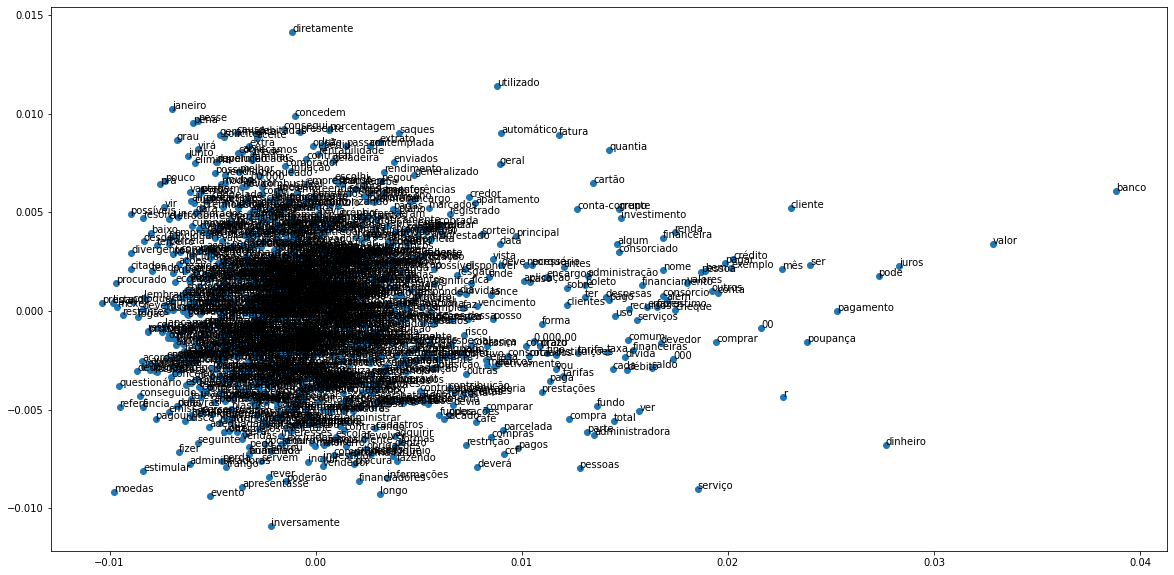

Word2Vec(vocab=1340, size=100, alpha=0.025)


In [136]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# train model
model = Word2Vec(sentences, min_count=1)

# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.figure(figsize=(20,10))
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# save model
model.save('model_bwe.bin')
model.wv.save_word2vec_format('model_bwe.txt', binary=False)

# load model
model_bwe = Word2Vec.load('model_bwe.bin')
print(model_bwe)

In [126]:
print(model_bwe['banco'])

[-5.46760345e-03 -1.72034348e-03 -4.85320203e-03  3.39068449e-03
 -4.03672643e-03  2.31758598e-03 -2.20536441e-03 -8.09428468e-03
 -5.54442918e-03  5.60689252e-03 -1.65595324e-03 -5.63757867e-03
  2.98185600e-03 -4.57809633e-03  3.50296660e-03 -5.97776938e-03
 -1.96158071e-03  2.26273993e-03 -3.05110007e-03  3.47319501e-03
  5.20597585e-03  2.16381345e-03 -2.02713022e-03 -4.61801793e-03
  2.96734017e-03 -2.47141416e-03 -1.01058166e-02  2.74123158e-03
 -4.34585614e-03  2.65504047e-03  1.73184741e-03  2.63324962e-03
 -2.82766484e-03  3.57659115e-03 -3.19245365e-03  1.83378835e-03
 -8.07870366e-03 -9.43129323e-03 -4.66252724e-03  9.49440524e-03
  1.93952094e-03 -5.61713008e-03  5.10150148e-03  6.23793108e-03
 -3.86015954e-03  3.29469633e-03 -3.61248991e-03 -4.06771991e-03
  3.36652645e-03  2.30185338e-03 -1.09561365e-02 -8.00289999e-05
 -2.28835596e-03 -1.43310666e-04  1.04416022e-03 -6.57511549e-03
  6.00495562e-03 -3.01797176e-03  5.80473803e-03 -1.26844086e-02
 -1.55495654e-03 -3.28377

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


## 4. Comparação entre Word2Vec, Glove e BWE

### 4.1. Importar biblioteca

In [138]:
import pandas as pd

### 4.1. Similaridade entre um par de palavras

Escolher duas palavras para verificar similaridade:

In [134]:
word1 = 'banco'

word2 = 'valor'

print('WordVec CBOW: ',similarity_2words(word1, word2, model_cbow))

print('Glove: ',similarity_2words(word1, word2, model_glove))

print('BWE: ',similarity_2words(word1, word2, model_bwe))

WordVec CBOW:  0.5716031789779663
Glove:  0.6650271415710449
BWE:  0.6953229308128357


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


### 4.2. Similaridade entre 'banco' e outras palavras

Palavras mais similares segundo o BWE:

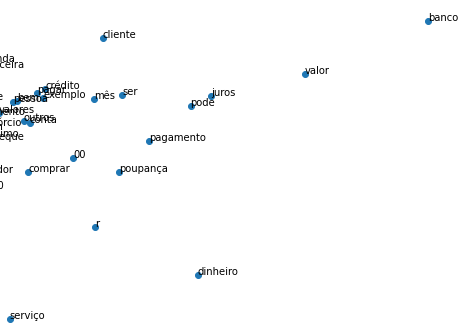

In [146]:
palavras = ['valor','juros','pagamento','poupança','dinheiro','cliente','comprar','crédito','serviço']

cbow = []
glove = []
bwe = []

for palavra in palavras:
  cbow.append(similarity_2words('banco', palavra, model_cbow))
  glove.append(similarity_2words('banco', palavra, model_glove))
  bwe.append(similarity_2words('banco', palavra, model_bwe))

df = pd.DataFrame(list(zip(palavras, cbow, glove, bwe)), 
               columns =['Palavras', 'CBOW', 'Glove', 'BWE'])

df['spec>gen'] = (df['BWE'] > df['Glove']) & (df['BWE'] > df['CBOW'])

df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


,Palavras,CBOW,Glove,BWE,spec>gen
0,valor,0.571603,0.665027,0.695323,True
1,juros,0.248311,0.629176,0.637589,True
2,pagamento,0.522324,0.652546,0.593549,False
3,poupança,0.220006,0.543432,0.632208,True
4,dinheiro,0.410055,0.621486,0.623654,True
5,cliente,0.472513,0.622152,0.564684,False
6,comprar,0.014624,0.526575,0.580381,True
7,crédito,0.482977,0.811110,0.553456,False
8,serviço,0.621220,0.625766,0.458480,False
